<a href="https://colab.research.google.com/github/KJPriyadharshini/TelecomChurnAnalysisPython/blob/main/Telecom_Churn_Analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Data Analysis

In [68]:
#importing the required libraries
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [69]:
#importing the dataset
#https://drive.google.com/file/d/1JcEsT3AsPNjUEQqgC6TDipn_twbJNs-F/view?usp=drive_link

# Downloading the dataset in the drive
file_id = "1JcEsT3AsPNjUEQqgC6TDipn_twbJNs-F"
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", "Telecom_Data.csv", quiet=False)

data = pd.read_csv('Telecom_Data.csv')

Downloading...
From: https://drive.google.com/uc?export=download&id=1JcEsT3AsPNjUEQqgC6TDipn_twbJNs-F
To: /content/Telecom_Data.csv
100%|██████████| 310k/310k [00:00<00:00, 80.9MB/s]


## Data Exploration

In [70]:
#showsthebasicinformationaboutthedataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [71]:
#showsthenumberofuniquedatasincolumns
data.nunique()

,0
state,51
account length,212
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667


In [72]:
#showsthestatisticsofnumericalcolums
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [73]:
#includesthecatogoricalcolumnsalso
data.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


## Checking missing and duplicate values

In [74]:
#to show the duplicate values
#data.duplicated()
data[data.duplicated()]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


## Feature Engineering

In [75]:
#total minutes used by customer
data['total_minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']

#total calls
data['total_calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls']

#total calls
data['total_charge'] = data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge']

#average call duration calculated and handled to replace Nan with 0
data['avg_call_duration'] = data['total_minutes'] / data['total_calls']
data['avg_call_duration'] = data['avg_call_duration'].replace([np.inf, -np.inf], np.nan).fillna(0)

#to compare if customers without intl plan engage in intl calls
data['is_international_user'] = data['total intl minutes'].apply(lambda x: 1 if x > 0 else 0)

#engagemt of cusotmer vs churn
threshold = data['total_minutes'].quantile(0.75)
data['is_heavy_user'] = data['total_minutes'].apply(lambda x: 1 if x > threshold else 0)

#creating bucket for account length
def bucket_tenure(length):
    if length < 60:
        return 'Short-term'
    elif 60 <= length < 120:
        return 'Mid-term'
    else:
        return 'Long-term'

data['tenure_group'] = data['account length'].apply(bucket_tenure)

In [76]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,avg_call_duration,is_international_user,is_heavy_user,tenure_group
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,2.70,1,False,717.2,303,75.56,2.366997,1,1,Long-term
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,3.70,1,False,625.2,332,59.24,1.883133,1,0,Mid-term
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,3.29,0,False,539.4,333,62.29,1.619820,1,0,Long-term
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,1.78,2,False,564.8,255,66.80,2.214902,1,0,Mid-term
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,2.73,3,False,512.0,359,52.09,1.426184,1,0,Mid-term


## Analyzing the 'churn' varialble

### Donut Chart

,Churn,Count
0,False,2850
1,True,483


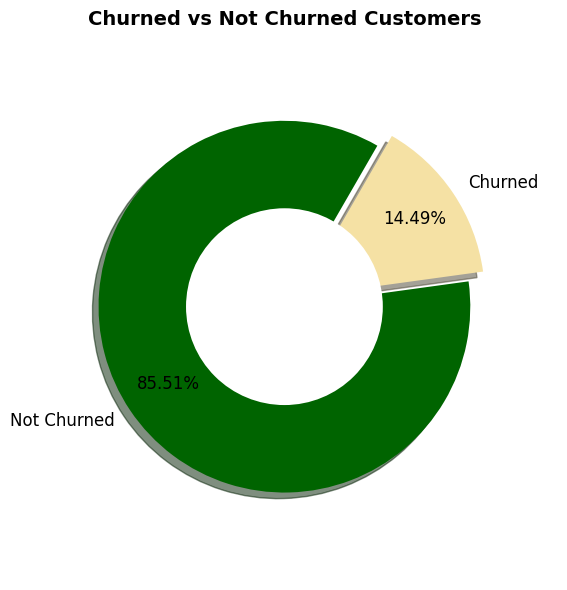

In [77]:
import matplotlib.pyplot as plt

# Step 1: Get churn counts
churn_counts = data['churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#006400', '#F5E1A4']  # pastel pink and teal

# Optional: Show value counts before the plot
churn_df = churn_counts.rename_axis('Churn').reset_index(name='Count')
display(churn_df)

# Step 2: Plot donut-style pie chart
plt.figure(figsize=(6, 6))  # make it clean and centered

plt.pie(
    churn_counts,
    labels=labels,
    colors=colors,
    startangle=60,
    shadow=True,
    radius=0.85,
    explode=(0, 0.08),
    autopct='%1.2f%%',
    pctdistance=0.75,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Step 3: Add white circle to make it a donut
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Step 4: Title and layout
plt.title('Churned vs Not Churned Customers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Out of 3333 customers, only ~14% have churned — this is an imbalanced churn scenario.

## Analyzing 'Churn' by Active Plans

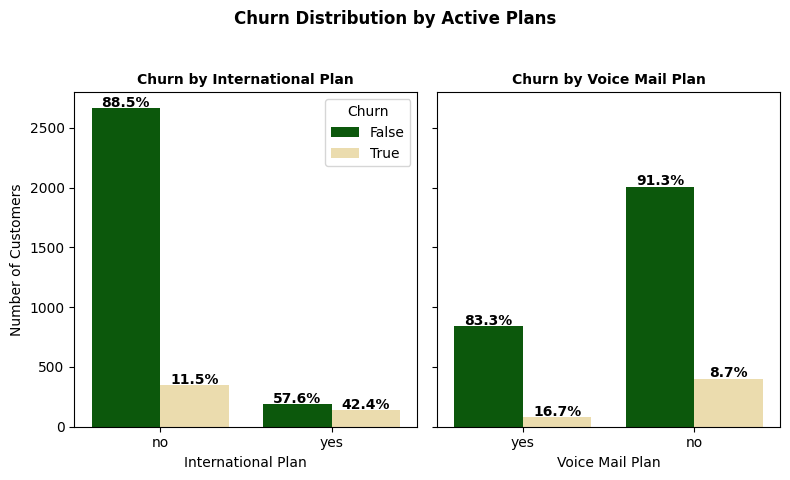

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect churn classes (handles 'yes'/'no' or 1/0)
churn_classes = sorted(data['churn'].unique(), key=lambda x: str(x))
churn_labels = [str(c).capitalize() for c in churn_classes]

# Setup subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

# ---- Helper Function for Annotating Bars ----
def annotate_bars(ax, groupby_col):
    # Compute % churn/non-churn
    churn_table = data.groupby(groupby_col)['churn'].value_counts(normalize=True).unstack().fillna(0) * 100

    # Annotate all bars
    for container_idx, container in enumerate(ax.containers):
        for i, bar in enumerate(container):
            height = bar.get_height()
            percent = churn_table.iloc[i, container_idx]
            ax.annotate(f"{percent:.1f}%",
                        (bar.get_x() + bar.get_width() / 2, height + 10),
                        ha='center', fontsize=10, fontweight='bold')

# ---- Plot 1: International Plan ----
sns.countplot(data=data, x='international plan', hue='churn', ax=axes[0], palette=colors)
axes[0].set_title('Churn by International Plan', fontsize=10, fontweight='bold')
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(title='Churn', labels=churn_labels)
annotate_bars(axes[0], 'international plan')

# ---- Plot 2: Voice Mail Plan ----
sns.countplot(data=data, x='voice mail plan', hue='churn', ax=axes[1], palette=colors, legend = True)
axes[1].set_title('Churn by Voice Mail Plan', fontsize=10, fontweight='bold')
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('')
axes[1].legend_.remove()
annotate_bars(axes[1], 'voice mail plan')

# Title & layout
plt.suptitle('Churn Distribution by Active Plans', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [79]:
# List of valid US states
valid_states = set([
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
])

# Check if there are any unexpected state codes
unexpected_states = set(data['state'].unique()) - valid_states
print("⚠️ Unexpected codes in your data:", unexpected_states)

⚠️ Unexpected codes in your data: {'DC'}


In [98]:
import plotly.express as px
import pandas as pd

# STEP 1: Ensure state codes are uppercase strings
data['state'] = data['state'].astype(str).str.upper()

# STEP 2: Filter churned customers (handles various formats)
churned = data[data['churn'].isin(['yes', 'Yes', 1, True])].copy()

# STEP 3: Remove problematic state codes like 'DC'
churned = churned[churned['state'] != 'DC']

# STEP 4: Count churned customers by state
churn_by_state = churned['state'].value_counts().reset_index()
churn_by_state.columns = ['state', 'churn_count']

# STEP 5: Plot the Choropleth map
fig = px.choropleth(
    churn_by_state,
    locations='state',
    locationmode='USA-states',
    color='churn_count',
    scope='usa',
    color_continuous_scale=['#F5E1A4', '#006400'],
    title='Churn Count by State (USA)'
)

# Optional: Styling
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=15, family='Arial', weight = 'bold'),
    geo=dict(bgcolor='rgba(0,0,0,0)')
)

fig.show()

Churn is geographically neutral — it does not significantly vary by customer location.

This indicates that churn behavior is not driven by regional differences, but is likely influenced by individual customer experiences, plan choices, or service quality across all areas.

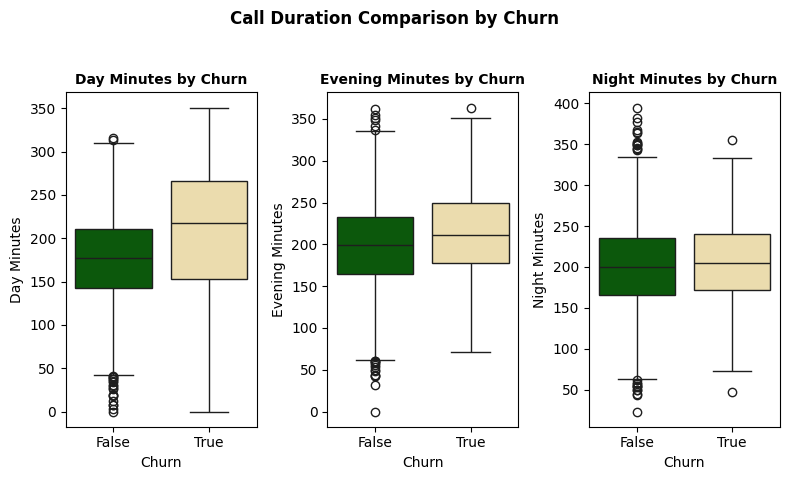

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

usage_columns = [
    ('total day minutes', 'Day'),
    ('total eve minutes', 'Evening'),
    ('total night minutes', 'Night')
]

fig, axes = plt.subplots(1, 3, figsize=(8, 5))

for ax, (col, label) in zip(axes, usage_columns):
    sns.boxplot(data=data, x='churn',hue = 'churn', y=col, palette= ['#006400', '#F5E1A4'], ax=ax, legend = False)
    ax.set_title(f'{label} Minutes by Churn', fontsize=10, fontweight='bold')
    ax.set_xlabel('Churn')
    ax.set_ylabel(f'{label} Minutes')

plt.suptitle('Call Duration Comparison by Churn', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


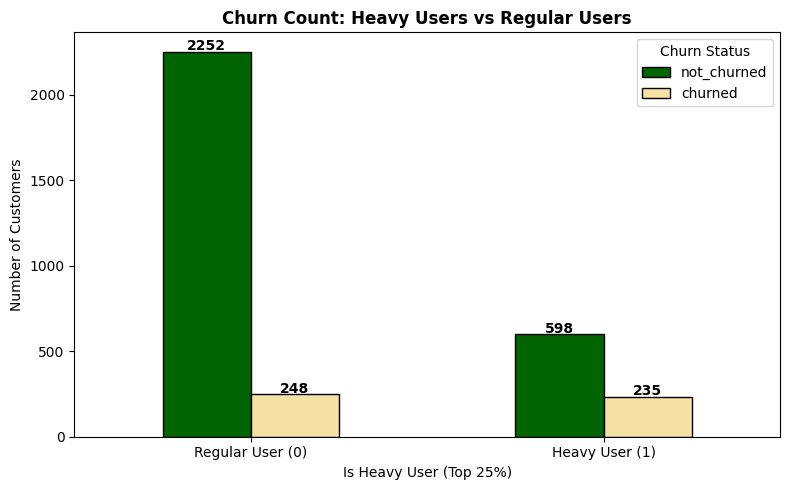

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get churn counts by heavy user flag
churn_counts = data.groupby('is_heavy_user')['churn'].value_counts().unstack().fillna(0)
churn_counts.columns = ['not_churned', 'churned']

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5))
churn_counts.plot(kind='bar', ax=ax, color= ['#006400', '#F5E1A4'] , edgecolor='black')

# Annotate actual counts
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{int(height)}",
                    (bar.get_x() + bar.get_width() / 2, height + 10),
                    ha='center', fontsize=10, fontweight='bold')

# Customize plot
ax.set_title('Churn Count: Heavy Users vs Regular Users', fontsize=12, fontweight='bold')
ax.set_xlabel('Is Heavy User (Top 25%)')
ax.set_ylabel('Number of Customers')
ax.set_xticklabels(['Regular User (0)', 'Heavy User (1)'], rotation=0)
ax.legend(title='Churn Status')
plt.tight_layout()
plt.show()

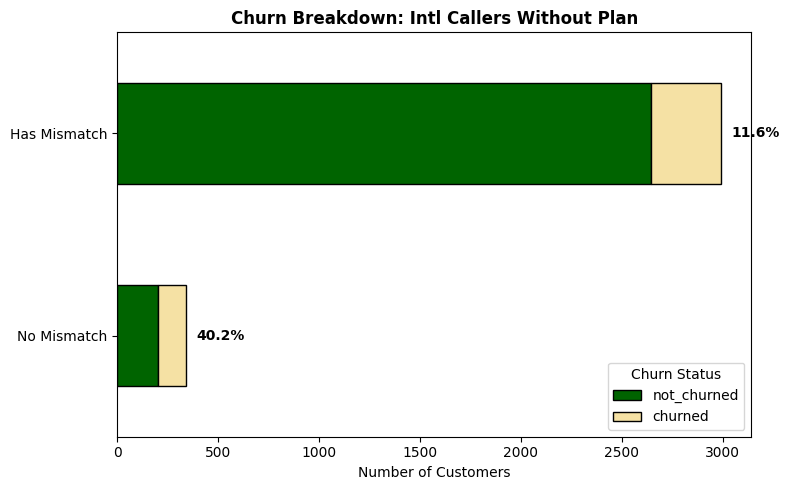

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the behavior flag using your existing column
data['intl_mismatch_user'] = data.apply(
    lambda row: 1 if row['international plan'] == 'no' and row['is_international_user'] == 1 else 0,
    axis=1
)

# Prepare data for visualization
churn_counts = data.groupby('intl_mismatch_user')['churn'].value_counts().unstack().fillna(0)
churn_counts.columns = ['not_churned', 'churned']
churn_counts['total'] = churn_counts.sum(axis=1)
churn_counts['churn_rate'] = churn_counts['churned'] / churn_counts['total'] * 100
churn_counts.index = ['No Mismatch', 'Has Mismatch']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

churn_counts[['not_churned', 'churned']].plot(
    kind='barh',
    stacked=True,
    color=['#006400', '#F5E1A4'],
    edgecolor='black',
    ax=ax
)

# Labels and title
ax.set_xlabel('Number of Customers')
ax.set_title('Churn Breakdown: Intl Callers Without Plan', fontweight = 'bold', fontsize = 12)
ax.legend(title='Churn Status', loc='lower right')

# Annotate churn rate
for idx, total in enumerate(churn_counts['total']):
    churn_rate = churn_counts['churn_rate'].iloc[idx]
    ax.annotate(f'{churn_rate:.1f}%',
                (total + 50, idx),  # x = just after bar, y = bar index
                va='center', fontsize=10, fontweight='bold')

# Clean y-axis labels
ax.set_yticklabels(churn_counts.index, rotation=0)
plt.tight_layout()
plt.show()

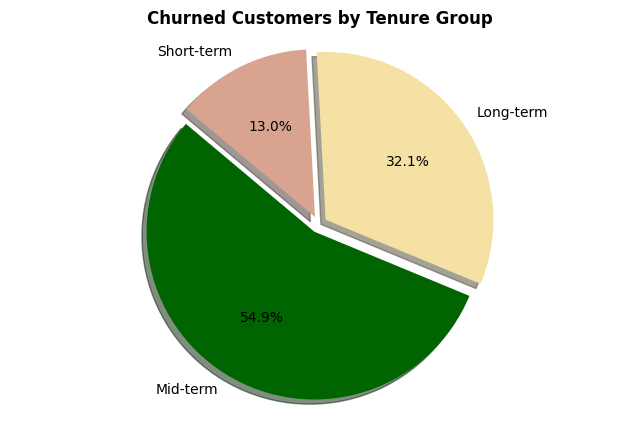

In [96]:
import matplotlib.pyplot as plt

# Filter only churned customers
churned_data = data[data['churn'] == True]

# Count churned customers by tenure group
tenure_churn_counts = churned_data['tenure_group'].value_counts()

# Pie chart
colors = ['#006400', '#F5E1A4', '#D8A48F']  # pink, orange, teal

plt.figure(figsize=(8,5))
plt.pie(
    tenure_churn_counts,
    labels=tenure_churn_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=(0.05, 0.05, 0.05),
    colors=colors
)
plt.title('Churned Customers by Tenure Group', fontweight = 'bold', fontsize = 12)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

churn,False,True
customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


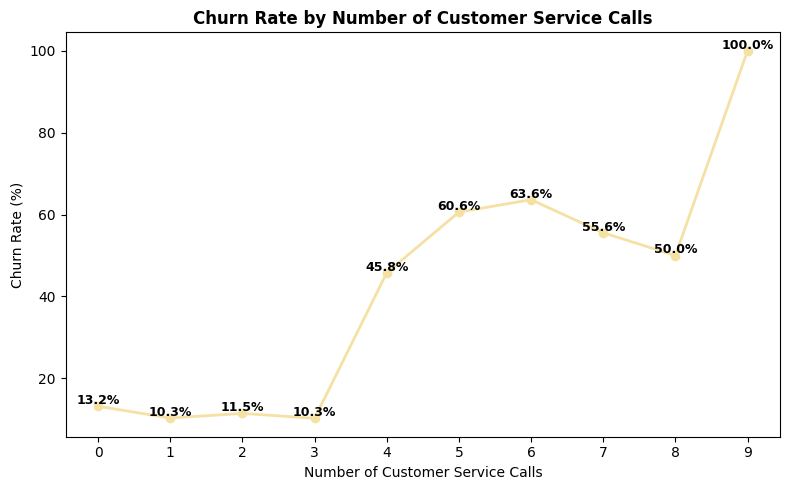

In [99]:
import matplotlib.pyplot as plt

# Group by number of service calls and calculate churn rate
service_calls_churn = data.groupby('customer service calls')['churn'].value_counts(normalize=True).unstack().fillna(0)
display(service_calls_churn)
service_calls_churn.columns = ['Not Churned', 'Churned']
service_calls_churn['Churn Rate'] = service_calls_churn['Churned'] * 100

# Plot churn rate by number of customer service calls
plt.figure(figsize=(8, 5))
plt.plot(service_calls_churn.index, service_calls_churn['Churn Rate'], marker='o', color= '#F5E1A4', linewidth=2)

# Annotate points
for x, y in zip(service_calls_churn.index, service_calls_churn['Churn Rate']):
    plt.text(x, y + 0.5, f"{y:.1f}%", ha='center', fontsize=9, fontweight='bold')

plt.title('Churn Rate by Number of Customer Service Calls', fontweight = 'bold', fontsize =12 )
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.xticks(service_calls_churn.index)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

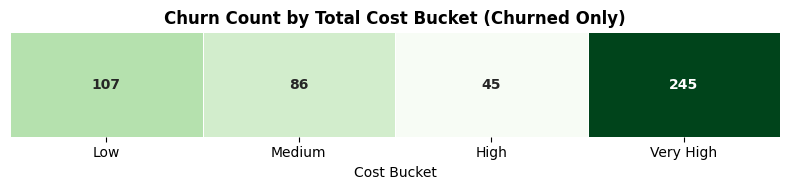

In [103]:
# 1. Create quartile-based cost buckets
data['cost_bucket'] = pd.qcut(data['total_charge'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 2. Filter only churned customers
churned_only = data[data['churn'] == 1]

# 3. Count churned customers by cost bucket
churn_counts = churned_only['cost_bucket'].value_counts().sort_index()

# 4. Convert to DataFrame format for heatmap
heat_data = pd.DataFrame(churn_counts).T  # Make it a row so heatmap can plot

# 5. Plot heatmap
plt.figure(figsize=(8, 2))  # Adjusted height for single-row heatmap
sns.heatmap(
    heat_data,
    annot=True,
    fmt='d',
    cmap='Greens',
    linewidths=0.5,
    cbar=False,
    linecolor='white',
    annot_kws={'fontsize': 10, 'fontweight': 'bold'}
)

# Final labels and formatting
plt.title('Churn Count by Total Cost Bucket (Churned Only)', fontsize=12, fontweight='bold')
plt.xlabel('Cost Bucket')
plt.ylabel('')
plt.yticks([])  # Remove the row label
plt.tight_layout()
plt.show()